In [1]:
# Import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power


import statsmodels.api as sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm


In [2]:
# Get the Data 

df = pd.read_csv('insurance (2).csv')

#1st 5 rows of data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# shape of the data 
df.shape

(1338, 7)

In [4]:
# data type of each variable 
df.info()

df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
### checking count of missing value

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# 5 point summary of numerical attributes
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\shashank.m\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


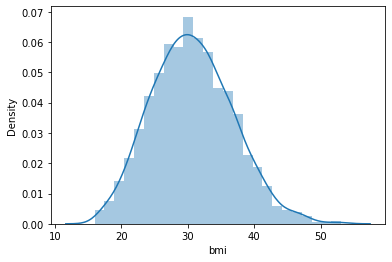

In [7]:
# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

### Distribution of BMI
sns.distplot(df['bmi']);  ### normal distribution


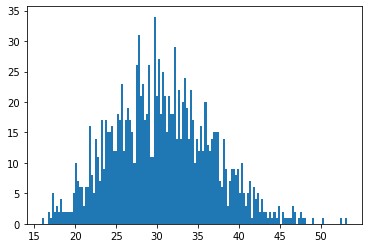

In [8]:
plt.hist(df['bmi'], bins = 150);  ### normal distribution


C:\Users\shashank.m\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


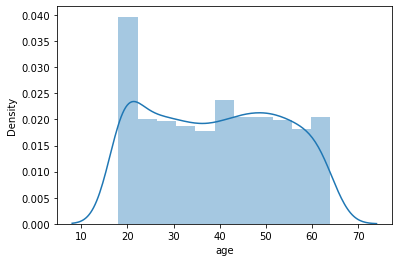

In [9]:
### Distribution of age

sns.distplot(df['age']); ### uni-modal distribution


C:\Users\shashank.m\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


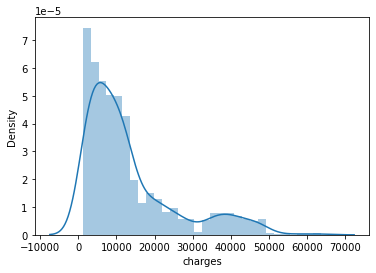

In [10]:
### Distribution of charges

sns.distplot(df['charges']); ### bi-modal distribution

In [11]:
### Skewness of  ‘bmi’, ‘age’ and ‘charges'

df[['bmi', 'age', 'charges']].skew()

### BMI is not skewed too much but charges are heavily skewd towards right

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

C:\Users\shashank.m\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


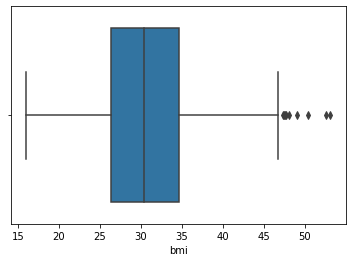

In [12]:
# Outlier Presence of ‘bmi’, ‘age’ and ‘charges'
sns.boxplot(df['bmi']);


C:\Users\shashank.m\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


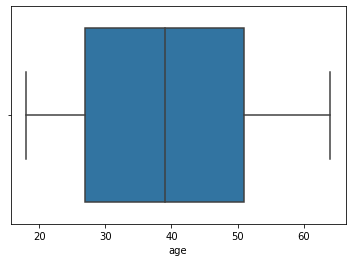

In [13]:
sns.boxplot(df['age']);

C:\Users\shashank.m\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


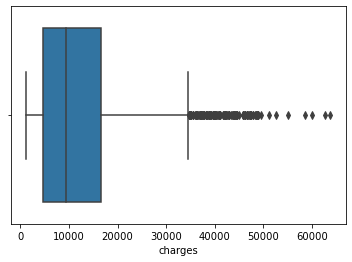

In [14]:
sns.boxplot(df['charges']);

In [15]:
# Distribution of categorical columns (include children)

df['children'].unique()

def cat(s1):
    if s1['children'] == 0:
        return 'zero'
    elif s1['children'] == 1:
        return 'one'
    elif s1['children'] == 2:
        return 'two'
    elif s1['children'] == 3:
        return 'three'
    elif s1['children'] == 4:
        return 'four'
    elif s1['children'] == 5:
        return 'five'
    else:
        return ''
    

df['children1'] = df.apply(cat, axis=1)


df[['sex', 'smoker', 'region', 'children1']].describe(include = 'all')

,sex,smoker,region,children1
count,1338,1338,1338,1338
unique,2,2,4,6
top,male,no,southeast,zero
freq,676,1064,364,574


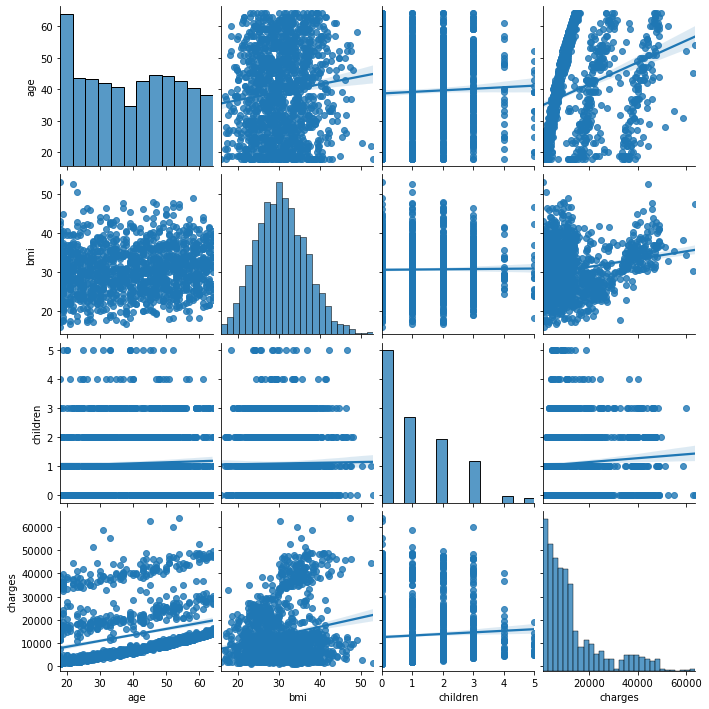

In [16]:
# Pair plot that includes all the columns of the data frame

sns.pairplot(df, kind = "reg")

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges,children1
0,19,female,27.900,0,yes,southwest,16884.92400,zero
1,18,male,33.770,1,no,southeast,1725.55230,one
2,28,male,33.000,3,no,southeast,4449.46200,three
3,33,male,22.705,0,no,northwest,21984.47061,zero
4,32,male,28.880,0,no,northwest,3866.85520,zero


In [18]:
# Do charges of people who smoke differ significantly from the people who don't?

#### null hypo smoker charges are same
#### alt hypo smoker chanrges are different

group1 = df[df['smoker'] == 'yes']['charges']
group2 = df[df['smoker'] == 'no']['charges']

t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)


# p value is smaller than 0.05 hence we reject the null hypo., hence smoker charges are different ( there is a impact of smoker on charges)

46.664921172723716 8.271435842177219e-283


In [19]:
### Does bmi of males differ significantly from that of females? 

#### null hypo male[bmi] = female[bmi]
#### alt hypo male[bmi] != female[bmi]

group1 = df[df['sex'] == 'male']['bmi']
group2 = df[df['sex'] == 'female']['bmi']

t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)


# with 95% CI, p value is greater than 0.05, I fail to reject the null hupo., hence male and female bmi is same

1.696752635752224 0.08997637178984932


In [20]:
#  Is the proportion of smokers significantly different in different genders?

## test of proportion

female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = df.sex.value_counts()[1] # number of females in the data
n_males = df.sex.value_counts()[0] #number of males in the data

from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

stat, pval


### With 95% CI, p value is greater than 0.05, I reject the null hypo.

(-2.7867402154855503, 0.005324114164320532)

In [21]:
df1 = df[['sex', 'children', 'bmi']]
df1 = df1[df1['sex'] == 'female']

df1

,sex,children,bmi
0,female,0,27.90
5,female,0,25.74
6,female,1,33.44
7,female,3,27.74
9,female,0,25.84
...,...,...,...
1332,female,3,44.70
1334,female,0,31.92
1335,female,0,36.85
1336,female,0,25.80


In [22]:
df1[df1['children'] ==0].mean()

children     0.000000
bmi         30.361522
dtype: float64

In [23]:
# Is the distribution of bmi across women with no children, one child and two children, the same?

### Anova

### null hypo. = all the bmi is same female[0][bmi] =  female[1][bmi] =  female[1][bmi]
### alt hypo --> atleast one bmi among the female is different

df1 = df[['sex', 'children', 'bmi']]
df1 = df1[df1['sex'] == 'female']
df1 = df1[df1['children'] != 3]
df1 = df1[df1['children'] != 4]
df1 = df1[df1['children'] != 5]

print(df1.groupby(['children'], as_index = False).agg({'bmi': np.mean}))


import statsmodels.api as sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula = 'bmi ~ C(children)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

### P value is higher then 0.5, hence we fail to reject the null hypo, hence the bmi value for all females with 0,1,2 children are same

   children        bmi
0         0  30.361522
1         1  30.052658
2         2  30.649790
                   sum_sq     df         F    PR(>F)
C(children)     24.590123    2.0  0.334472  0.715858
Residual     20695.661583  563.0       NaN       NaN
